In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
def load_dataset():
    df = pd.read_csv('googleplaystore.csv')
    return df

load_dataset()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
def print_summarize_dataset(df):
    print("Dataset dimension:")
    print(df.shape)
    print()
    print("Data types:")
    print(df.dtypes)
    print()
    print("Statistical summary:")
    print(df.describe())
    
        
df = load_dataset() 
print_summarize_dataset(df)

Dataset dimension:
(10841, 13)

Data types:
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Statistical summary:
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


# Cleaning and Pre-processing

In [4]:
def clean_dataset(df):
    #print(df.isna().any())
    # Drop rows with NaN values in any columns
    df.dropna(inplace=True)
    # Convert Data Types and clean
    df['App'] = df['App'].astype(str)
    df['Reviews'] = df['Reviews'].astype(int)
    # Drop rows where 'Size' equals "Varies with device"
    df = df.drop(df[df['Size'] == 'Varies with device'].index)  
    # Convert to bytes based on the units (M, k, G)
    df['Size'] = df['Size'].apply(
    lambda x: float(x.replace('M', '')) * 1024 * 1024 if 'M' in str(x) else (
              float(x.replace('k', '')) * 1024 if 'k' in str(x) else (
              float(x.replace('G', '')) * 1024 ** 3 if 'G' in str(x) else None)))
    
    # Remove comma and plus sign, and convert the column to int
    df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
    df['Type'] = df['Type'].astype('category')
    # Remove '$' from the 'Price' column and convert to float
    df['Price'] = df['Price'].str.replace('$', '').astype(float)
    df['Content Rating'] = df['Content Rating'].astype('category')
    df['Genres'] = df['Genres'].astype(str)
    # Convert to datetime format
    df['Last Updated'] = pd.to_datetime(df['Last Updated'])
    df['Current Ver'] = df['Current Ver'].astype(str)
    df['Android Ver'] = df['Android Ver'].astype('category')
    return df
    

In [5]:
dataset = clean_dataset(df)
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,633856.0,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2726297.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,55574528.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3774873.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up


# Data Analysis

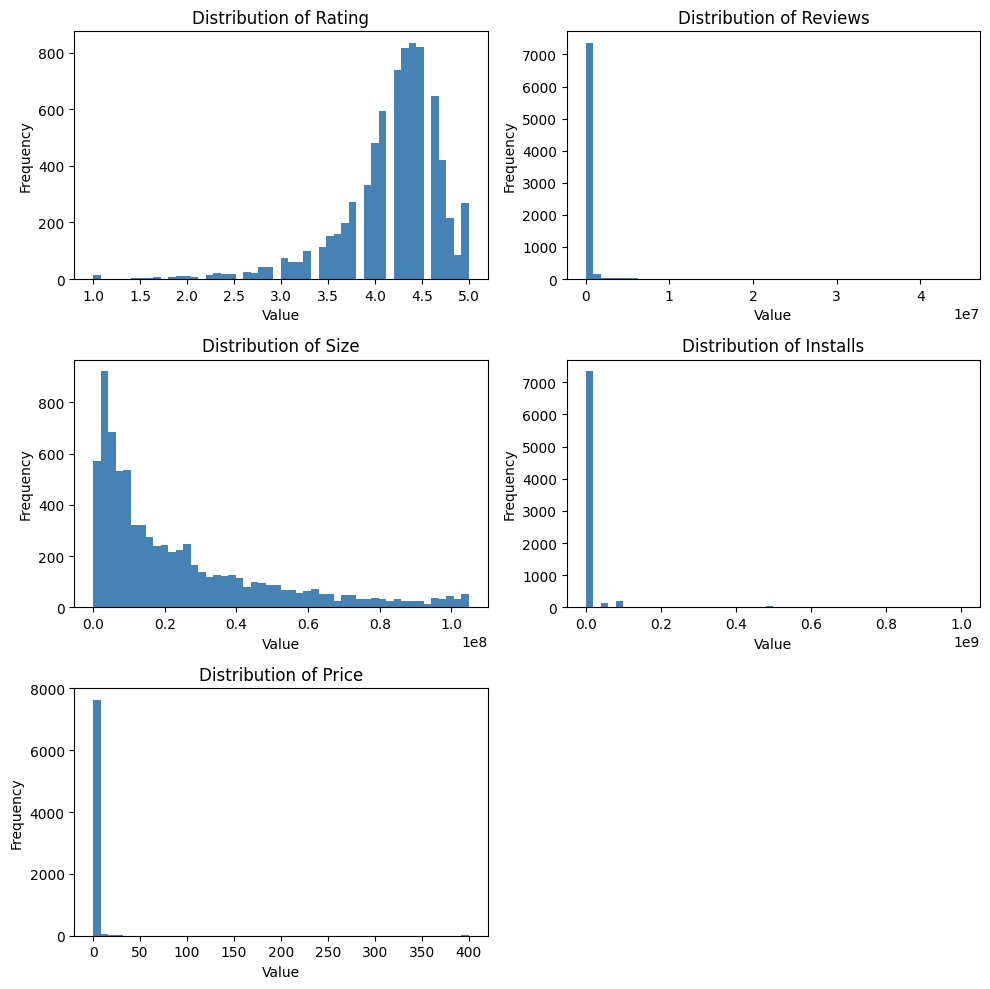

In [6]:
def print_histograms(dataset):
    # List of numeric columns
    numeric_columns = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
    
    # Create 3x2 grid of subplots
    fig, axs = plt.subplots(3, 2, figsize=(10, 10))
    axs = axs.ravel()
    
    # Plot a histogram for each numeric column
    for i, col_name in enumerate(numeric_columns):
        axs[i].hist(dataset[col_name], bins=50, color='steelblue')
        axs[i].set_title(f'Distribution of {col_name}')
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')
        
    axs[-1].axis('off')
    plt.tight_layout();
    
    return numeric_columns
    
numeric_columns = print_histograms(dataset)

In [7]:
def compute_correlations_matrix(dataset, numeric_columns):
    correlations = dataset[numeric_columns].corr(method='pearson')
    return correlations

print(compute_correlations_matrix(dataset, numeric_columns))

            Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.079819  0.083643  0.052693 -0.021320
Reviews   0.079819  1.000000  0.240381  0.626187 -0.010184
Size      0.083643  0.240381  1.000000  0.162707 -0.026274
Installs  0.052693  0.626187  0.162707  1.000000 -0.010852
Price    -0.021320 -0.010184 -0.026274 -0.010852  1.000000


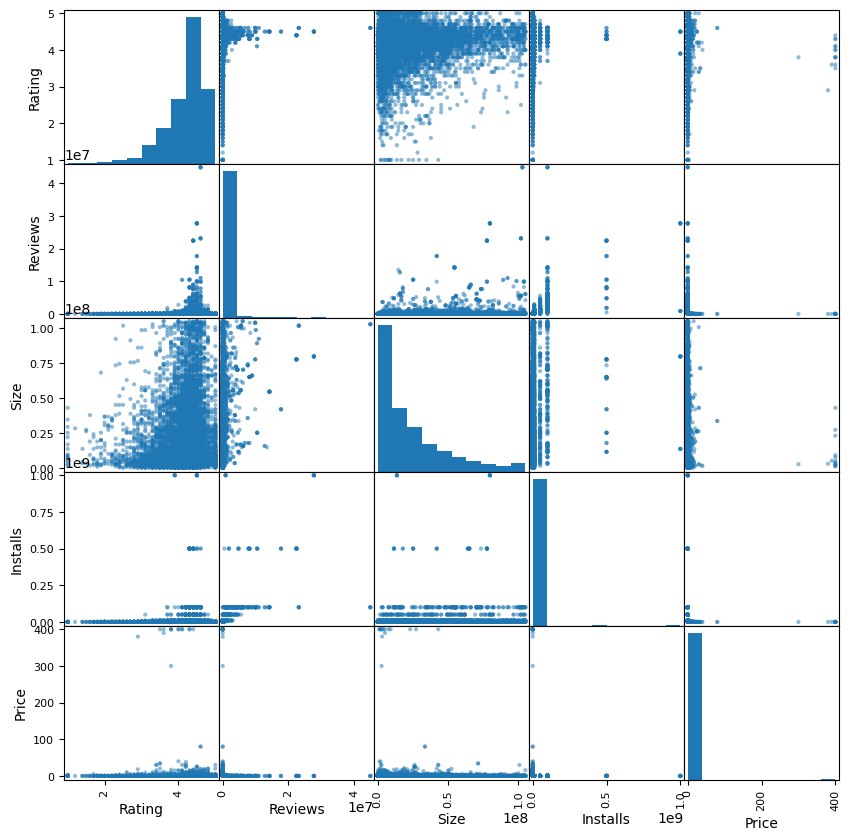

In [8]:
def print_scatter_matrix(dataset):
    pd.plotting.scatter_matrix(dataset[numeric_columns], figsize=(10,10));
    
     
print_scatter_matrix(dataset)

### Plot with bar diagram the most populars paid apps of Family category

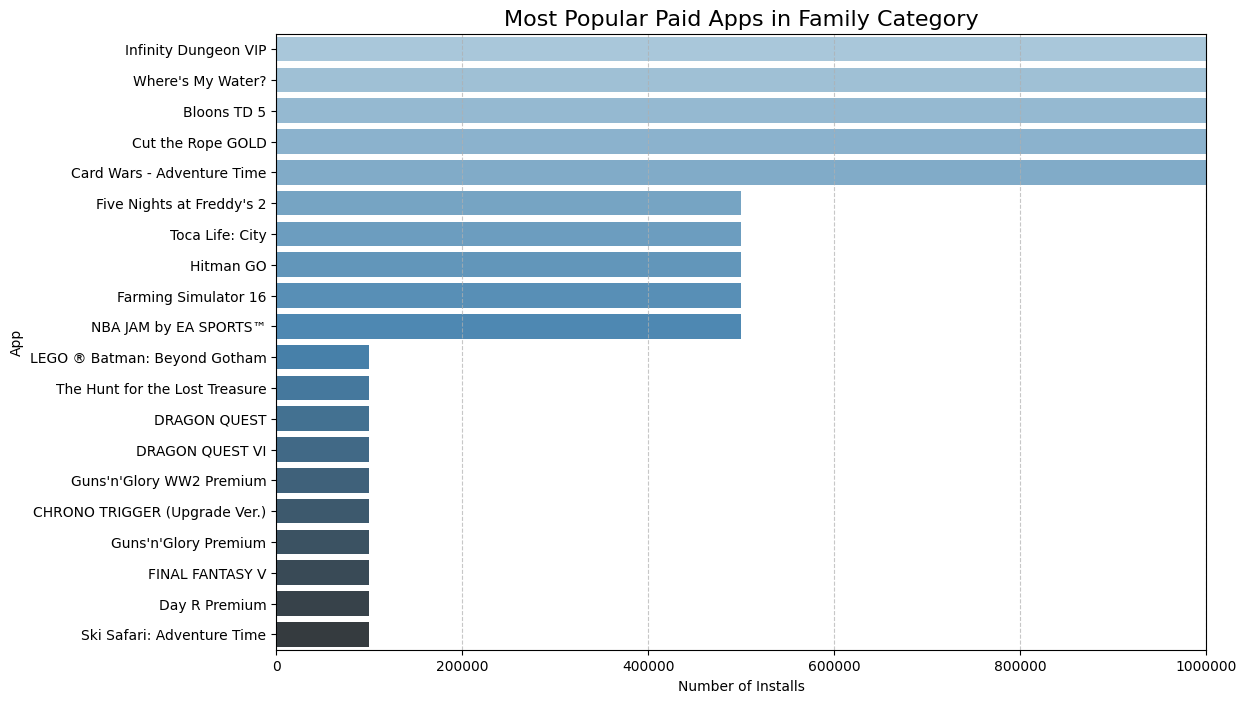

In [145]:
def plot_most_popular_apps(dataset):
    # Filter to only include Family category and Paid apps
    filtered_df = dataset[(dataset['Category'] == 'FAMILY') & (dataset['Type'] == 'Paid')]
    sorted_df = filtered_df.sort_values('Installs', ascending=False)
    
    # Select the top 20 most popular apps
    top_20 = sorted_df.head(20)
    
    # Create the bar plot
    plt.figure(figsize=(12, 8))
    sns.barplot(y=top_20['App'], x=top_20['Installs'], palette="Blues_d")
    plt.xlabel('Number of Installs')
    plt.ylabel('App')
    plt.title('Most Popular Paid Apps in Family Category', fontsize=16)
    
    # Turn off scientific notation
    plt.ticklabel_format(useOffset=False, style='plain', axis='x')
    plt.xlim(0, 1000000)  
    plt.xticks([0, 200000, 400000, 600000, 800000, 1000000])  # set x-axis ticks
    plt.grid(axis='x', linestyle='--', alpha=0.7);
    

# Use the function
plot_most_popular_apps(dataset)

### Plot with a pie diagram the most popular genres according to the number of installations from paid family

861670


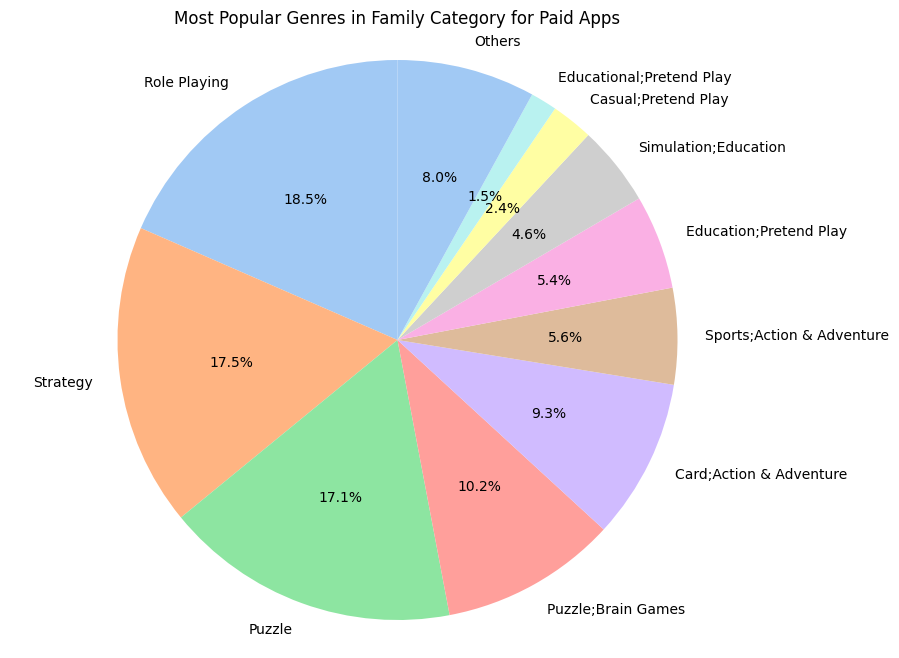

In [121]:
def plot_most_popular_genres(dataset):
    filtered_df = dataset[(dataset['Category'] == 'FAMILY') & (dataset['Type'] == 'Paid')]
    # Group by Genres and sum Installs
    genre_groups = filtered_df.groupby('Genres')['Installs'].sum().reset_index()
    sorted_genres = genre_groups.sort_values('Installs', ascending=False)
    top_10 = sorted_genres.head(10)
    
    # Sum up the "Installs" for all other genres
    other_installs = sorted_genres[10:]['Installs'].sum()
    # Create a new series with the top N genres and an "Others" category
    top_n_series = top_10.set_index('Genres')['Installs']
    final_series = pd.concat([top_n_series, pd.Series([other_installs], index=['Others'])])
    
    
    # Create the pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(final_series, labels=final_series.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Most Popular Genres in Family Category for Paid Apps', fontsize=12);
    

plot_most_popular_genres(dataset) 

### An array with the number of installation per category

In [118]:
def install_counts_by_cat(dataset):
    grouped = dataset.groupby('Category')['Installs'].sum()
    sorted_genres = grouped.sort_values(ascending=False)
    # Apply formatting to make the number more readable
    sorted_genres = sorted_genres.apply(lambda x: '{:,}'.format(x))
    
    return sorted_genres

install_counts_by_cat(dataset)

Category
GAME                   29,874,452,717
FAMILY                  6,798,383,580
COMMUNICATION           4,941,915,530
NEWS_AND_MAGAZINES      4,251,900,550
TOOLS                   3,525,553,500
PRODUCTIVITY            2,742,302,080
PHOTOGRAPHY             2,557,893,130
SHOPPING                1,504,231,540
SPORTS                  1,138,911,465
PERSONALIZATION           998,131,930
ENTERTAINMENT             950,960,000
SOCIAL                    925,240,475
VIDEO_PLAYERS             891,762,200
HEALTH_AND_FITNESS        868,406,220
BUSINESS                  535,932,920
LIFESTYLE                 437,739,120
TRAVEL_AND_LOCAL          356,638,300
FINANCE                   316,887,300
EDUCATION                 278,702,000
FOOD_AND_DRINK            177,567,750
MAPS_AND_NAVIGATION       175,015,560
DATING                    141,865,110
BOOKS_AND_REFERENCE       139,784,155
WEATHER                   139,296,500
ART_AND_DESIGN             99,228,100
HOUSE_AND_HOME             74,982,000
LIB

### Plot a pie with the number of installation per category

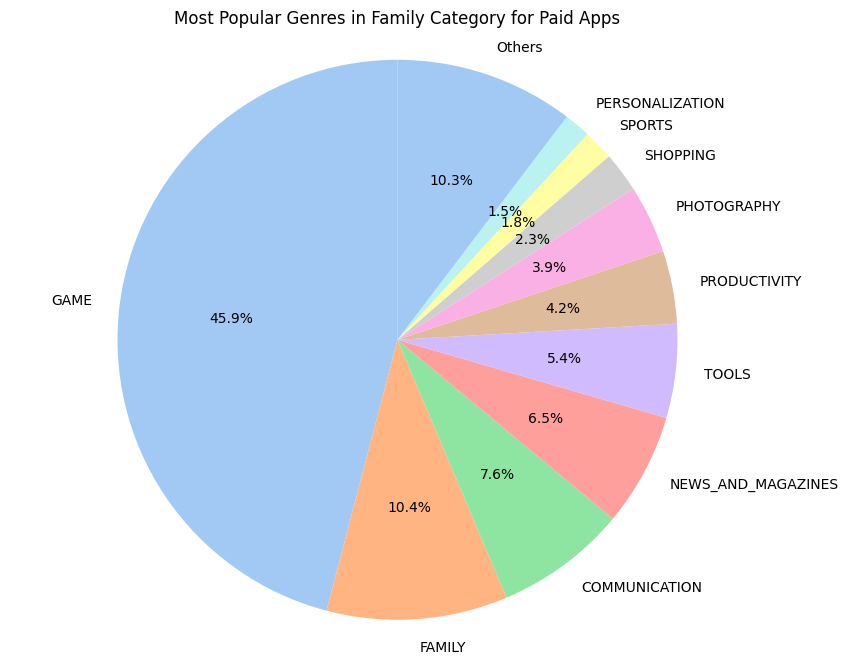

In [133]:
def plot_installations_by_category(dataset):
    grouped = dataset.groupby('Category')['Installs'].sum()
    sorted_genres = grouped.sort_values(ascending=False)
    top_10 = sorted_genres.head(10)
    # Calculate the sum for the 'Others' category
    other_installs = sorted_genres[10:].sum()
    final_series = pd.concat([top_10, pd.Series([other_installs], index=['Others'])])
    
    
    # Create the pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(final_series, labels=final_series.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Most Popular Genres in Family Category for Paid Apps', fontsize=12);
    

plot_installations_by_category(dataset)

### Plot a bar with the mean price per category

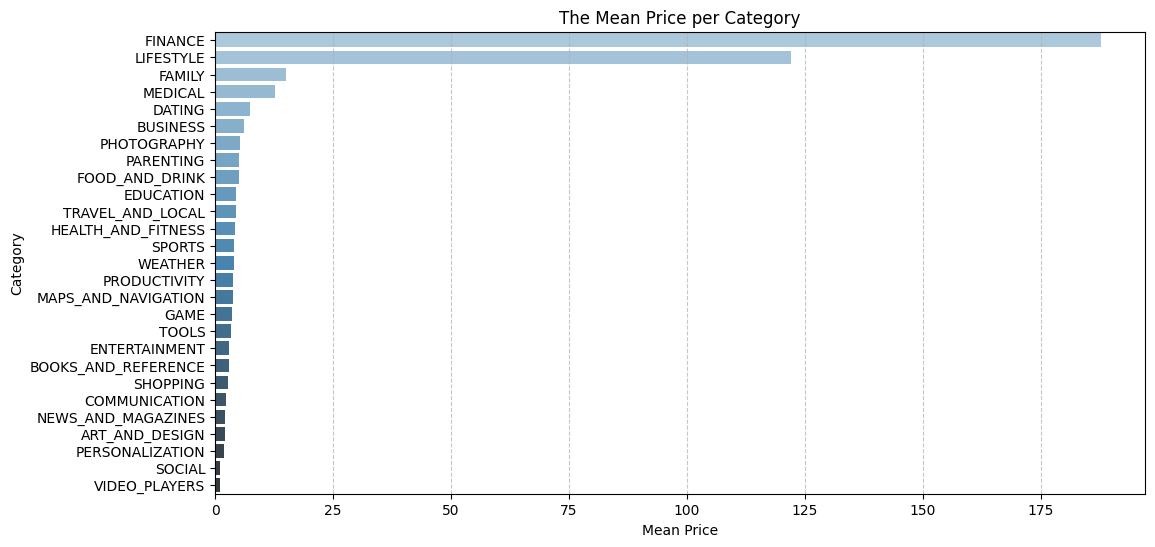

In [9]:
def plot_avg_price(dataset):
    paid_apps = dataset[dataset['Type'] == 'Paid']
    # Group the filtered dataset by 'Category' and calculate the mean price
    mean_price_per_category = paid_apps.groupby('Category')['Price'].mean()
    sorted_categories = mean_price_per_category.sort_values(ascending=False)
    
    # Create the bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(y=sorted_categories.index, x=sorted_categories.values, palette="Blues_d")
    
    plt.xlabel('Mean Price')
    plt.ylabel('Category')
    plt.title('The Mean Price per Category')
    plt.grid(axis='x', linestyle='--', alpha=0.7);
    
plot_avg_price(dataset)

### Most expensive apps per category

In [23]:
def most_expensive_apps(dataset):
    paid_apps = dataset[dataset['Type'] == 'Paid']
    sorted_apps = paid_apps.sort_values('Price', ascending=False)
    # Keep only the columns of interest
    sorted_apps = sorted_apps[['Category', 'App', 'Price']]
    # Select the top 15 most expensive apps
    top_15 = sorted_apps.head(15)
    
    return top_15

most_expensive_apps(dataset)

,Category,App,Price
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5356,FINANCE,I Am Rich Premium,399.99
5359,FINANCE,I am rich(premium),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
5358,FINANCE,I am Rich!,399.99
5373,FINANCE,I AM RICH PRO PLUS,399.99
4197,FAMILY,most expensive app (H),399.99
5369,FINANCE,I am Rich,399.99
5362,FAMILY,I Am Rich Pro,399.99
5351,LIFESTYLE,I am rich,399.99
